# Projeto 3: Car Insurance Claim Prediction

Objetivo: Construir um modelo de classificação para predição dos sinistros.

O conjunto de dados contém várias informações sobre segurados e a variável target (outcome) indica se o segurado terá um sinistro (ou não) nos próximos 6 meses. Há um script Python intitulado Claims.ipynb para ajudá-los a fazer a leitura do arquivo csv.

### Dados de treinamento e test dos modelos de ML:
* Divida os dados em 80% para treinamento e 20% para teste.

## Tarefas a serem feitas
1. Aplicar lowercase em todas as colunas;
2. Excluir caracteres especiais dos nomes das colunas;
3. Tratamento dos outliers;
4. Tratamento dos missing values;
5. Lidar com dados categóricos;
6. Fazer EDA (Análise Expploratória de Dados);
7. Seleção de features;
8. Definir as amostras de treinamento e validação;
9. Escolher o algoritmo a ser aplicado;
10. Métricas de performance dos algoritmos;
11. Selecionar o melhor modelo preditivo;
---

## Importação dos dados

In [33]:

import pandas as pd

path_file = 'https://raw.githubusercontent.com/MathMachado/DSWP/refs/heads/master/Dataframes/Car_Insurance_Claim.csv'

df = pd.read_csv(path_file)
df.head(50)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


## 1) Aplicar lowercase em todas as colunas.

Antes de iniciar as análises, é feita a padronização com o nome das colunas, onde todas recebem lowercase. Isso por tratar-se de uma boa prática de limpeza e padronização de dados, evitando erros de digitação que podem ser pegos pelo case sensitivity do python, além de manter a consistência dos formatos.

In [34]:
df.columns = df.columns.str.lower()
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## 2) Excluir caracteres especiais dos nomes das colunas.

Em seguida, os caracteres especiais são removidos usando regex. Remover caracteres especiais (como acentos, ç, símbolos como @, #, $, %, espaços, parênteses, etc.) dos nomes das colunas de uma base de dados é outra boa prática na preparação de dados. Isso porque garante evitar erros em linguagens de programação e evita problemas de codificação, uma vez que determinados caracteres exigem a codificação UTF-8.

In [35]:
import re

df.columns = [re.sub(r'[^a-zA-Z0-9_]', '', col) for col in df.columns]
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## 3) Tratamento dos Outliers

Depois foi feito o tratamento dos outliers. Identificou-se todas as colunas numéricas de df e, para cada uma delas, aplicou-se uma técnica de tratamento de outliers com base no Intervalo Interquartil (IQR). Por fim, substituiu-se qualquer valor abaixo do limite inferior pelo próprio limite inferior, e qualquer valor acima do limite superior pelo limite superior. Ao final de cada coluna processada, imprimiu um resumo dos valores calculados para facilitar o acompanhamento do tratamento.

In [36]:
# Identificando colunas numéricas
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Tratamento por IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Limitando outliers
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    print(f"\nOutliers treated for column: {col}")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Outliers treated for column: id
  Q1: 249638.5, Q3: 753974.5, IQR: 504336.0
  Lower Bound: -506865.5, Upper Bound: 1510478.5

Outliers treated for column: credit_score
  Q1: 0.41719131629370454, Q3: 0.6183116646745281, IQR: 0.2011203483808236
  Lower Bound: 0.11551079372246914, Upper Bound: 0.9199921872457635

Outliers treated for column: vehicle_ownership
  Q1: 0.0, Q3: 1.0, IQR: 1.0
  Lower Bound: -1.5, Upper Bound: 2.5

Outliers treated for column: married
  Q1: 0.0, Q3: 1.0, IQR: 1.0
  Lower Bound: -1.5, Upper Bound: 2.5

Outliers treated for column: children
  Q1: 0.0, Q3: 1.0, IQR: 1.0
  Lower Bound: -1.5, Upper Bound: 2.5

Outliers treated for column: postal_code
  Q1: 10238.0, Q3: 32765.0, IQR: 22527.0
  Lower Bound: -23552.5, Upper Bound: 66555.5

Outliers treated for column: annual_mileage
  Q1: 10000.0, Q3: 14000.0, IQR: 4000.0
  Lower Bound: 4000.0, Upper Bound: 20000.0

Outliers treated for column: speeding_violations
  Q1: 0.0, Q3: 2.0, IQR: 2.0
  Lower Bound: -3.0, Uppe

## 4) Tratamento dos missing values.

Primeiro, identificou-se e exibiu a quantidade de valores nulos antes do tratamento. Em seguida, separou-se as colunas em numéricas e categóricas. Para as colunas numéricas, preencheu-se os valores ausentes com a mediana de cada coluna — uma estratégia robusta que evita distorções causadas por outliers, ao contrário da média. Já para as colunas categóricas, optou-se por remover as linhas inteiras que contivessem qualquer valor nulo, já que imputar valores nessas colunas (como "desconhecido") pode introduzir viés ou ruído. Esse processo é crucial porque modelos de machine learning e análises estatísticas não lidam bem com dados ausentes, podendo gerar erros, resultados enviesados ou perda de desempenho.

In [37]:
print("Missing values before treatment:")
print(df.isnull().sum())

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Treat missing values in numerical columns with median imputation
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in numerical column '{col}' with median: {median_val}")

# Remove rows with missing values in categorical columns
initial_rows = df.shape[0]
if not categorical_cols.empty:
    df.dropna(subset=categorical_cols, inplace=True)
    print(f"Removed {initial_rows - df.shape[0]} rows due to missing values in categorical columns.")
else:
    print("No categorical columns found for row removal.")


print("\nMissing values after treatment:")
print(df.isnull().sum())

Missing values before treatment:
id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64
Filled missing values in numerical column 'credit_score' with median: 0.5250327586154788
Filled missing values in numerical column 'annual_mileage' with median: 12000.0
Removed 0 rows due to missing values in categorical columns.

Missing values after treatment:
id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
cre

/tmp/ipython-input-245787199.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


## 6) Análise exploratória

A Análise Exploratória de Dados (EDA – Exploratory Data Analysis) é uma etapa fundamental no processo de ciência de dados que consiste em resumir, visualizar e investigar as principais características de um conjunto de dados, geralmente por meio de estatísticas descritivas e gráficos, antes de aplicar modelos ou tirar conclusões. Seu objetivo é entender a estrutura dos dados, identificar padrões, detectar outliers, verificar a presença de valores ausentes, explorar relações entre variáveis e validar suposições.

Assim, nos próximos passos foram feitas diversas análises para entender melhor a relevância, relação e comportamento dos dados.

### 6.1) Conhecendo os dados

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         10000 non-null  float64
 8   vehicle_ownership    10000 non-null  float64
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  float64
 11  children             10000 non-null  float64
 12  postal_code          10000 non-null  float64
 13  annual_mileage       10000 non-null  float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [39]:
df.describe()

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000
mean,500521.906800,0.516737,0.697000,0.498200,0.688800,18628.146200,11726.700000,1.301100,0.0,0.997800,0.313300
std,290030.768758,0.130695,0.459578,0.500022,0.463008,14464.259248,2674.906096,1.669945,0.0,1.443608,0.463858
min,101.000000,0.115511,0.000000,0.000000,0.000000,10238.000000,4000.000000,0.000000,0.0,0.000000,0.000000
25%,249638.500000,0.431509,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.0,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.0,0.000000,0.000000
75%,753974.500000,0.607607,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.0,2.000000,1.000000
max,999976.000000,0.919992,1.000000,1.000000,1.000000,66555.500000,20000.000000,5.000000,0.0,5.000000,1.000000


### 6.2) Distribuição de classes

Class distribution of 'outcome' variable:
outcome
0.0    6867
1.0    3133
Name: count, dtype: int64

Percentage of classes:
outcome
0.0    68.67
1.0    31.33
Name: proportion, dtype: float64


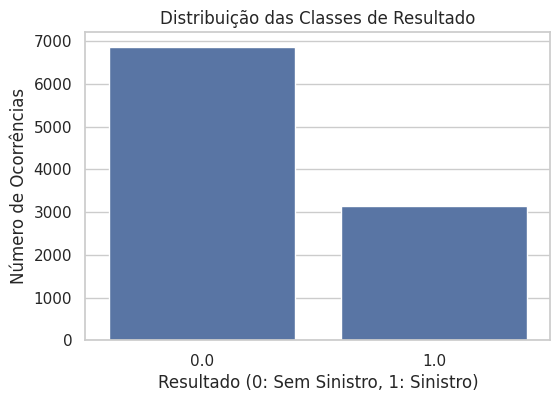


Note: Class balancing techniques (e.g., SMOTE for oversampling, undersampling) should generally be applied to the *training data* after splitting the dataset into training and testing sets, not on the full dataset during initial EDA. This prevents data leakage and ensures a more realistic evaluation of your model's performance.


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable 'outcome'
print("Class distribution of 'outcome' variable:")
print(df['outcome'].value_counts())
print("\nPercentage of classes:")
print(df['outcome'].value_counts(normalize=True) * 100)

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='outcome', data=df)
plt.title('Distribuição das Classes de Resultado') # Translated title
plt.xlabel('Resultado (0: Sem Sinistro, 1: Sinistro)') # Translated x-label
plt.ylabel('Número de Ocorrências') # Translated y-label
plt.show()

# Explanation for class balancing timing
print("\nNote: Class balancing techniques (e.g., SMOTE for oversampling, undersampling) should generally be applied to the *training data* after splitting the dataset into training and testing sets, not on the full dataset during initial EDA. This prevents data leakage and ensures a more realistic evaluation of your model's performance.")


### 6.3) Taxa de sinistro (OUTCOME) por cada subgrupo

0.3133
     age   outcome
0  16-25  0.718254
1  26-39  0.336925
2  40-64  0.155919
3    65+  0.098492
  driving_experience   outcome
0               0-9y  0.628045
1             10-19y  0.238557
2             20-29y  0.051439
3               30y+  0.019011
  vehicle_year   outcome
1  before 2015  0.403330
0   after 2015  0.106495
  vehicle_type   outcome
1   sports car  0.324948
0        sedan  0.312717
   gender   outcome
1    male  0.363126
0  female  0.263673
     education  outcome
1         none  0.47154
0  high school  0.32331
2   university  0.22556


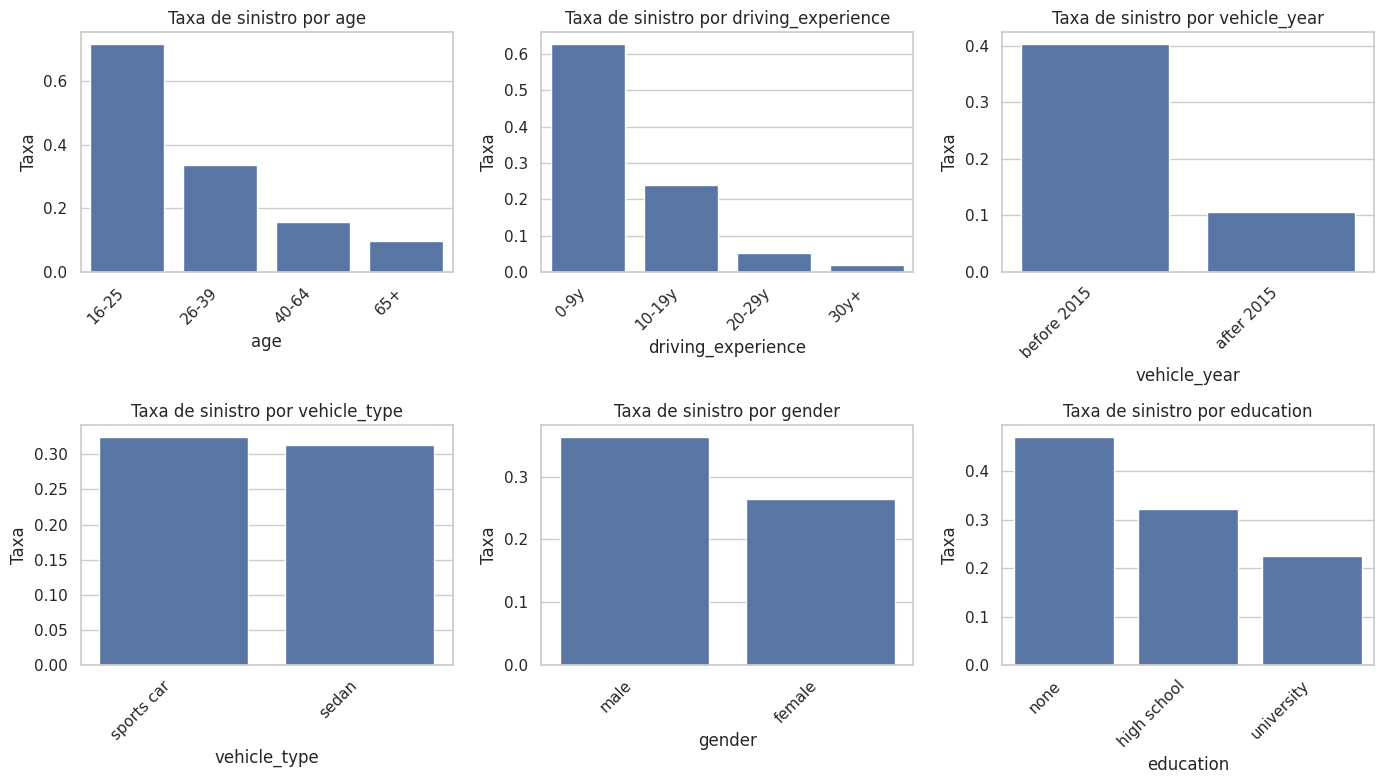

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Taxa global de sinistro
global_rate = df['outcome'].mean()
print(global_rate)

cols = ['age','driving_experience','vehicle_year','vehicle_type','gender','education']
rate_tables = {}
for c in cols:
    tbl = df.groupby(c)['outcome'].mean().reset_index().sort_values('outcome', ascending=False)
    rate_tables[c] = tbl
    print(tbl.head())

# Visualizações por subgrupo
plt.figure(figsize=(14,8))
for i, c in enumerate(cols, 1):
    plt.subplot(2,3,i)
    data_plot = rate_tables[c]
    sns.barplot(x=c, y='outcome', data=data_plot)
    plt.title('Taxa de sinistro por ' + c)
    plt.xlabel(c)
    plt.ylabel('Taxa')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 6.4) Distrbuição dos perfis socioeconômicos

In [42]:
# Configurações básicas de visualização e utilitários para EDA univariada
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200)
sns.set(style='whitegrid')
palette = sns.color_palette('Set2')

# Funções auxiliares simples
def bar_countplot(df, col, figsize=(8,4), order=None, rotate=0):
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x=col, order=order, palette=palette)
    plt.title('Contagem por ' + col)
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=rotate, ha='right')
    plt.tight_layout()
    plt.show()

def hist_num(df, col, bins=30, figsize=(7,4)):
    plt.figure(figsize=figsize)
    sns.histplot(df[col], bins=bins, kde=True, color=palette[0])
    plt.title('Distribuicao de ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequencia')
    plt.tight_layout()
    plt.show()

6.4.1) Perfil por idade

/tmp/ipython-input-2456479408.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
/tmp/ipython-input-2456479408.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


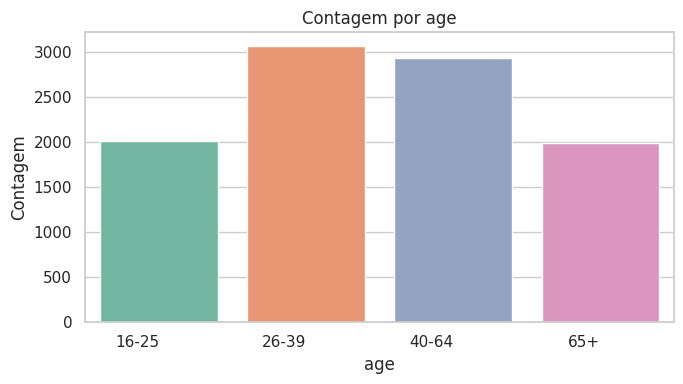

age
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64


In [43]:
# Análise univariada: distribuição de AGE
df_uni = df.copy()

# Ordem lógica para visualização
age_order = ['16-25','26-39','40-64','65+']
bar_countplot(df_uni, 'age', figsize=(7,4), order=age_order)

print(df_uni['age'].value_counts())

6.4.2) Perfil por gênero

/tmp/ipython-input-2456479408.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
/tmp/ipython-input-2456479408.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


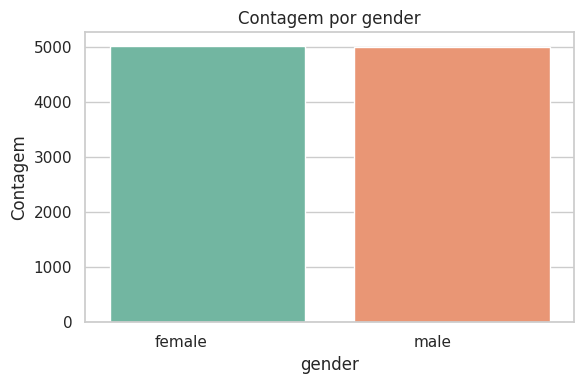

gender
female    5010
male      4990
Name: count, dtype: int64


In [44]:
# Análise univariada: distribuição de GENDER
df_uni = df.copy()

bar_countplot(df_uni, 'gender', figsize=(6,4))

print(df_uni['gender'].value_counts())

6.4.3) Perfil por Educação

/tmp/ipython-input-2456479408.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
/tmp/ipython-input-2456479408.py:14: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


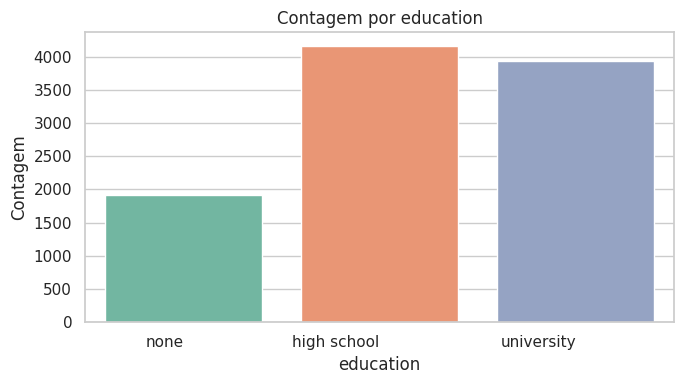

education
high school    4157
university     3928
none           1915
Name: count, dtype: int64


In [45]:
# Análise univariada: EDUCATION
df_uni = df.copy()

edu_order = ['none','high school','university']
bar_countplot(df_uni, 'education', figsize=(7,4), order=edu_order)
print(df_uni['education'].value_counts())# Análise univariada: education
df_uni = df.copy()

6.4.4) Perfil por renda

/tmp/ipython-input-2456479408.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
/tmp/ipython-input-2456479408.py:14: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


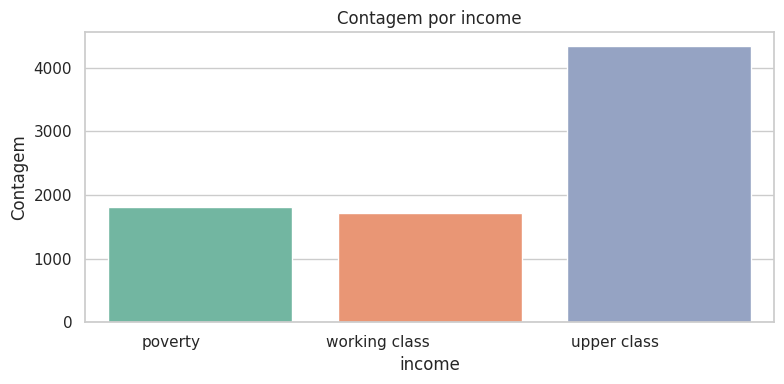

income
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64


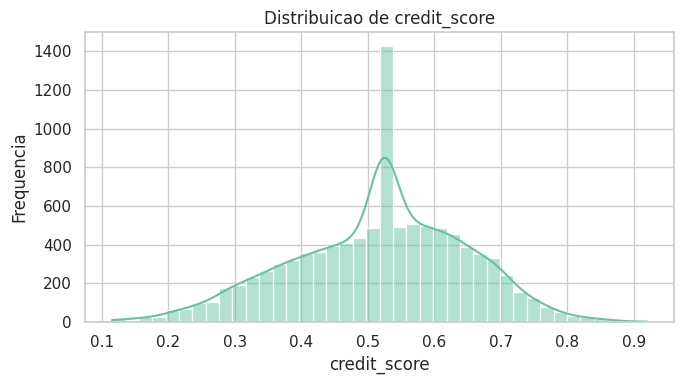

count    10000.000000
mean         0.516737
std          0.130695
min          0.115511
25%          0.431509
50%          0.525033
75%          0.607607
max          0.919992
Name: credit_score, dtype: float64


In [46]:
# Análise univariada: INCOME (categórica) e CREDIT_SCORE (numérica)
df_uni = df.copy()

# INCOME
income_order = ['poverty','working class','upper class']
bar_countplot(df_uni, 'income', figsize=(8,4), order=income_order, rotate=0)
print(df_uni['income'].value_counts())

# CREDIT_SCORE
hist_num(df_uni, 'credit_score', bins=40)
print(df_uni['credit_score'].describe())

### 6.5) Distribuição por perfil do automóvel

6.5.1) Perfil por ano do veículo

/tmp/ipython-input-2456479408.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
/tmp/ipython-input-2456479408.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


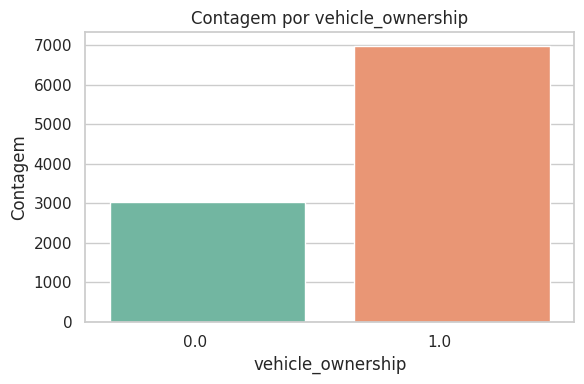

/tmp/ipython-input-2456479408.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
/tmp/ipython-input-2456479408.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


vehicle_ownership
1.0    6970
0.0    3030
Name: count, dtype: int64


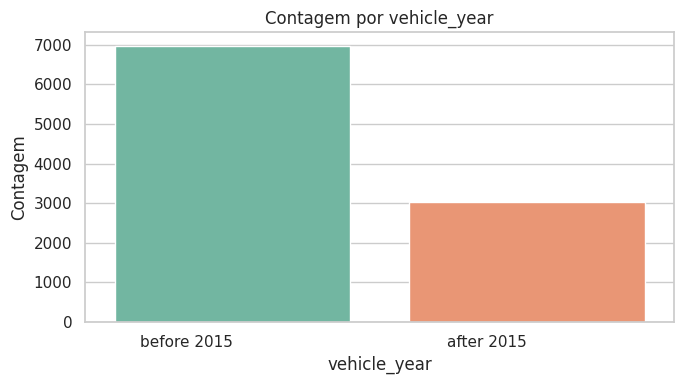

vehicle_year
before 2015    6967
after 2015     3033
Name: count, dtype: int64


/tmp/ipython-input-2456479408.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
/tmp/ipython-input-2456479408.py:14: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


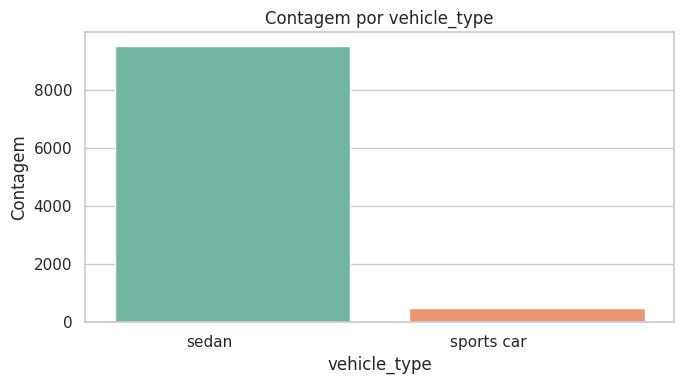

vehicle_type
sedan         9523
sports car     477
Name: count, dtype: int64


In [50]:
# Análise univariada: VEÍCULO
df_uni = df.copy()

# VEHICLE_OWNERSHIP
bar_countplot(df_uni, 'vehicle_ownership', figsize=(6,4))
print(df_uni['vehicle_ownership'].value_counts())

# VEHICLE_YEAR
year_order = ['before 2015','after 2015']
bar_countplot(df_uni, 'vehicle_year', figsize=(7,4), order=year_order)
print(df_uni['vehicle_year'].value_counts())

# VEHICLE_TYPE
bar_countplot(df_uni, 'vehicle_type', figsize=(7,4))
print(df_uni['vehicle_type'].value_counts())

### 6.6) Matriz de correlação

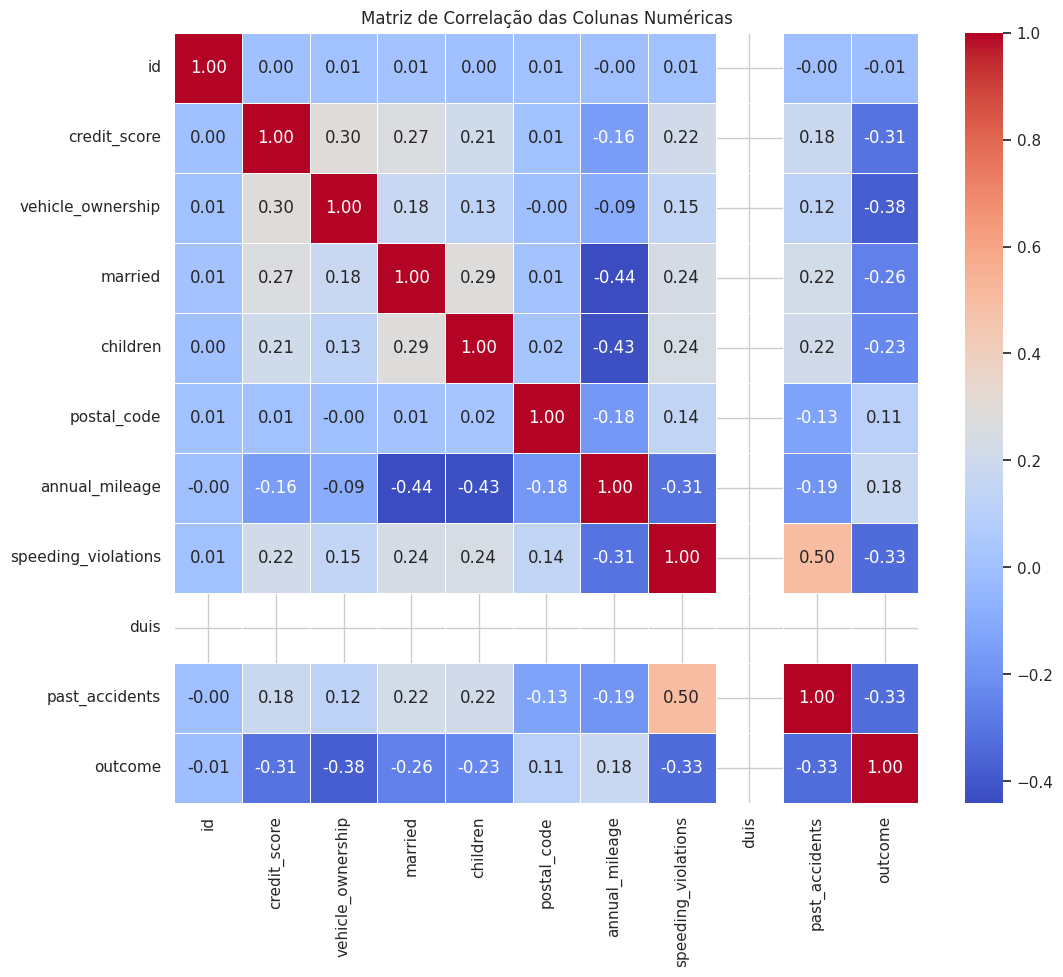

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Colunas Numéricas')
plt.show()

## 7) Seleção de features

### 7.1) Seleção das features numéricas

Para a seleção das features numéricas, usamos a técnica de seleção por variância, na qual os dados das colunas numéricas são primeiro normalizados e depois submetidos ao teste.

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection

# Selecionar apenas colunas numéricas
df_clean = df.drop(columns=['id','outcome', 'postal_code', 'children', 'married', 'vehicle_ownership'])
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Remover linhas com NaN nas numéricas
X = df[num_cols].dropna()

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Seleção por variância
vt = feature_selection.VarianceThreshold(threshold=0.25)
X_sel = vt.fit_transform(X_scaled)

# Variâncias por coluna original
variances = pd.Series(vt.variances_, index=num_cols)
selected_cols = [c for c, keep in zip(num_cols, vt.get_support()) if keep]
print(variances.sort_values(ascending=False).head(10))
print(selected_cols)

# Head dos dados selecionados
X_sel_df = pd.DataFrame(X_sel, columns=selected_cols)
X_sel_df.head()

credit_score           1.0
speeding_violations    1.0
annual_mileage         1.0
past_accidents         1.0
duis                   0.0
dtype: float64
['credit_score', 'annual_mileage', 'speeding_violations', 'past_accidents']


,credit_score,annual_mileage,speeding_violations,past_accidents
0,0.859226,0.102177,-0.779166,-0.691220
1,-1.216478,1.597631,-0.779166,-0.691220
2,-0.180512,-0.271687,-0.779166,-0.691220
3,-2.377594,-0.271687,-0.779166,-0.691220
4,-0.982266,0.102177,0.418538,0.001524


Assim, permanecemos com as colunas: 'credit_score', 'annual_mileage', 'speeding_violations', 'past_accidents'

### 7.2) Seleção de colunas categóricas

Para a seleção das variáveis categóricas foi feito uma análise manual das variâncias/distribuição das categorias. Assim, aquelas que possuiam pouca variância na distribuição, foram descartadas.

/tmp/ipython-input-1259773470.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette='viridis') # Using 'viridis' palette for a change
/tmp/ipython-input-1259773470.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette='viridis') # Using 'viridis' palette for a change
/tmp/ipython-input-1259773470.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette='viridis') # Using 'viridis' palette for a change
/tmp/ipython-input-1259773470.p

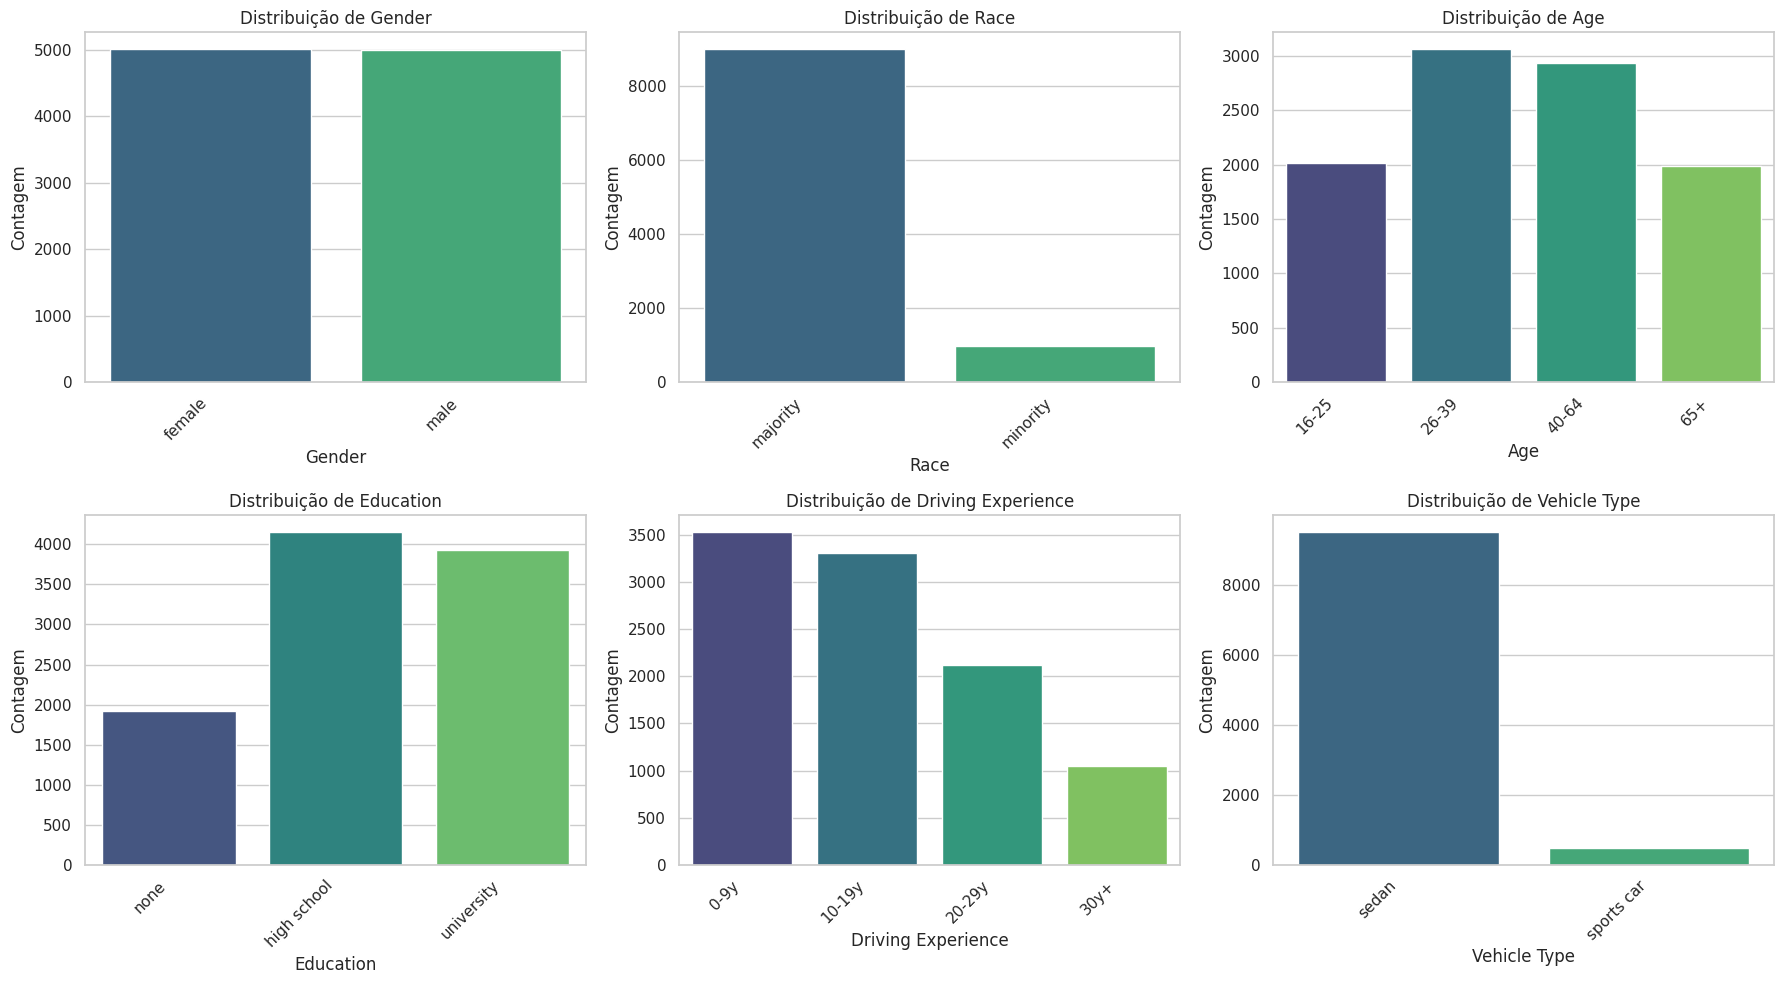

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns for which to generate distribution plots
columns_to_plot = ['gender', 'race', 'age', 'education', 'driving_experience', 'vehicle_type']

# Define the number of columns per row for the subplots
cols_per_row = 3
nrows = (len(columns_to_plot) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(18, 5 * nrows))

for i, col in enumerate(columns_to_plot):
    plt.subplot(nrows, cols_per_row, i + 1)

    order = None
    if col == 'age':
        order = ['16-25', '26-39', '40-64', '65+']
    elif col == 'education':
        order = ['none', 'high school', 'university']
    elif col == 'driving_experience':
        order = ['0-9y', '10-19y', '20-29y', '30y+']

    sns.countplot(x=col, data=df, order=order, palette='viridis')
    plt.title(f'Distribuição de {col.replace('_', ' ').title()}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Duas das categóricas apresentaram disparidade na distribuição de valores. Para validar, faremos uma análise da distribuição dessas categorias em relação ao outcome, isso para saber se de fato causam algum impacto na saída.

In [64]:
import pandas as pd

# Create a cross-tabulation between 'vehicle_type' and 'outcome'
race_outcome_comparison = pd.crosstab(df['vehicle_type'], df['outcome'])

# Calculate percentages for each row
percentage_by_race = race_outcome_comparison.apply(lambda r: r/r.sum(), axis=1) * 100

print("Percentual do OUTCOME (0 ou 1) por categoria de VEHICLE_TYPE:")
print(percentage_by_race)

Percentual do OUTCOME (0 ou 1) por categoria de VEHICLE_TYPE:
outcome             0.0        1.0
vehicle_type                      
sedan         68.728342  31.271658
sports car    67.505241  32.494759


In [65]:
import pandas as pd

# Create a cross-tabulation between 'race' and 'outcome'
race_outcome_comparison = pd.crosstab(df['race'], df['outcome'])

# Calculate percentages for each row
percentage_by_race = race_outcome_comparison.apply(lambda r: r/r.sum(), axis=1) * 100

print("Percentual do OUTCOME (0 ou 1) por categoria de RACE:")
print(percentage_by_race)

Percentual do OUTCOME (0 ou 1) por categoria de RACE:
outcome         0.0        1.0
race                          
majority  68.797159  31.202841
minority  67.510121  32.489879


A porcentagem de distribuição entre as categorias é correspondente, o que pode indicar que de fato não afetam tanto o resultado de outcome.

### 7.3) Seleção de colunas booleanas

Para esse caso de estudo, todas as booleanas serão consideradas.

## 5) Lidar com dados categóricos

Esse passo em específico foi feito apenas depois da análise exploratória e da seleção de features, pois ele fará uma mudança drástica no formato dos dados. Para as colunas categóricas, aplicou-se a técnica de One-Hot encoding e Label-encoding. Essa primeira é uma técnica de pré-processamento de dados usada para transformar variáveis categóricas nominais (ou seja, categorias sem ordem implícita, como "cor", "país" ou "tipo de produto") em um formato numérico que pode ser compreendido por algoritmos de machine learning. Ele cria uma nova coluna binária (0 ou 1) para cada categoria única da variável original, indicando a presença (1) ou ausência (0) daquela categoria em cada observação.

Já a segunda é uma técnica de codificação usada para transformar variáveis categóricas em valores numéricos, atribuindo a cada categoria única um número inteiro (por exemplo: "baixo" → 0, "médio" → 1, "alto" → 2). Essa abordagem é simples e útil principalmente quando há uma ordem implícita nas categorias (variáveis ordinais), pois preserva essa hierarquia numérica.

### 5.1) Definição do dataframe com as colunas selecionadas

In [69]:
df_oficial = df[['credit_score', 'annual_mileage', 'speeding_violations', 'past_accidents', 'gender', 'age', 'education', 'driving_experience', 'postal_code', 'children', 'married', 'vehicle_ownership', 'vehicle_year', 'outcome']]
df_oficial.head()

,credit_score,annual_mileage,speeding_violations,past_accidents,gender,age,education,driving_experience,postal_code,children,married,vehicle_ownership,vehicle_year,outcome
0,0.629027,12000.0,0.0,0.0,female,65+,high school,0-9y,10238.0,1.0,0.0,1.0,after 2015,0.0
1,0.357757,16000.0,0.0,0.0,male,16-25,none,0-9y,10238.0,0.0,0.0,0.0,before 2015,1.0
2,0.493146,11000.0,0.0,0.0,female,16-25,high school,0-9y,10238.0,0.0,0.0,1.0,before 2015,0.0
3,0.206013,11000.0,0.0,0.0,male,16-25,university,0-9y,32765.0,1.0,0.0,1.0,before 2015,0.0
4,0.388366,12000.0,2.0,1.0,male,26-39,none,10-19y,32765.0,0.0,0.0,1.0,before 2015,1.0


### 5.2) Transformando categóricas ordenadas

In [70]:
# Ordinal mapping for 'age'
age_mapping = {'16-25': 0, '26-39': 1, '40-64': 2, '65+': 3}
df_oficial['age'] = df_oficial['age'].map(age_mapping)

# Ordinal mapping for 'driving_experience'
driving_experience_mapping = {'0-9y': 0, '10-19y': 1, '20-29y': 2, '30y+': 3}
df_oficial['driving_experience'] = df_oficial['driving_experience'].map(driving_experience_mapping)

# Ordinal mapping for 'education'
education_mapping = {'none': 0, 'high school': 1, 'university': 2}
df_oficial['education'] = df_oficial['education'].map(education_mapping)

print("Label Encoding applied to 'age', 'driving_experience', and 'education'.")
df_oficial.head()

Label Encoding applied to 'age', 'driving_experience', and 'education'.


/tmp/ipython-input-481859593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oficial['age'] = df_oficial['age'].map(age_mapping)
/tmp/ipython-input-481859593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oficial['driving_experience'] = df_oficial['driving_experience'].map(driving_experience_mapping)
/tmp/ipython-input-481859593.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,credit_score,annual_mileage,speeding_violations,past_accidents,gender,age,education,driving_experience,postal_code,children,married,vehicle_ownership,vehicle_year,outcome
0,0.629027,12000.0,0.0,0.0,female,3,1,0,10238.0,1.0,0.0,1.0,after 2015,0.0
1,0.357757,16000.0,0.0,0.0,male,0,0,0,10238.0,0.0,0.0,0.0,before 2015,1.0
2,0.493146,11000.0,0.0,0.0,female,0,1,0,10238.0,0.0,0.0,1.0,before 2015,0.0
3,0.206013,11000.0,0.0,0.0,male,0,2,0,32765.0,1.0,0.0,1.0,before 2015,0.0
4,0.388366,12000.0,2.0,1.0,male,1,0,1,32765.0,0.0,0.0,1.0,before 2015,1.0


### 5.3) Transformando as demais categóricas

In [71]:
import pandas as pd

# Columns to apply one-hot encoding
columns_for_onehot = ['gender', 'postal_code', 'vehicle_year']

# Apply One-Hot Encoding
df_oficial = pd.get_dummies(df_oficial, columns=columns_for_onehot, drop_first=True)

print("One-Hot Encoding applied to 'gender', 'postal_code', and 'vehicle_year'.")
df_oficial.head()

One-Hot Encoding applied to 'gender', 'postal_code', and 'vehicle_year'.


,credit_score,annual_mileage,speeding_violations,past_accidents,age,education,driving_experience,children,married,vehicle_ownership,outcome,gender_male,postal_code_21217.0,postal_code_32765.0,postal_code_66555.5,vehicle_year_before 2015
0,0.629027,12000.0,0.0,0.0,3,1,0,1.0,0.0,1.0,0.0,False,False,False,False,False
1,0.357757,16000.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1.0,True,False,False,False,True
2,0.493146,11000.0,0.0,0.0,0,1,0,0.0,0.0,1.0,0.0,False,False,False,False,True
3,0.206013,11000.0,0.0,0.0,0,2,0,1.0,0.0,1.0,0.0,True,False,True,False,True
4,0.388366,12000.0,2.0,1.0,1,0,1,0.0,0.0,1.0,1.0,True,False,True,False,True


## 8) Definir as amostras de treinamento e validação.

Para isso serão considerados 80% do dataset para treino e 20% para teste.

In [72]:
from sklearn.model_selection import train_test_split

# Separar features (X) e target (y)
X = df_oficial.drop('outcome', axis=1)
y = df_oficial['outcome']

# Dividir os dados em conjuntos de treinamento e validação (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\nVerificando a distribuição da classe 'outcome' nos conjuntos de treino e teste:")
print("y_train value counts:\n", y_train.value_counts(normalize=True))
print("y_test value counts:\n", y_test.value_counts(normalize=True))

Shape de X_train: (8000, 15)
Shape de X_test: (2000, 15)
Shape de y_train: (8000,)
Shape de y_test: (2000,)

Verificando a distribuição da classe 'outcome' nos conjuntos de treino e teste:
y_train value counts:
 outcome
0.0    0.68675
1.0    0.31325
Name: proportion, dtype: float64
y_test value counts:
 outcome
0.0    0.6865
1.0    0.3135
Name: proportion, dtype: float64


## 9) Escolher o algoritmo a ser aplicado.



### 9.1) Modelo de regressão logística

In [73]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model_lr = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for small datasets or L1/L2 regularization

# Train the model
model_lr.fit(X_train, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")

Modelo de Regressão Logística treinado com sucesso!


In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Acurácia do Modelo de Regressão Logística: {accuracy_lr:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))

Acurácia do Modelo de Regressão Logística: 0.8385

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1373
         1.0       0.76      0.71      0.74       627

    accuracy                           0.84      2000
   macro avg       0.81      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000


Matriz de Confusão:
[[1229  144]
 [ 179  448]]


### 9.2) Modelo KNN Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN Classifier model
model_knn = KNeighborsClassifier() # You can specify parameters like n_neighbors, weights, etc.

# Train the model
model_knn.fit(X_train, y_train)

print("Modelo KNN Classifier treinado com sucesso!")

Modelo KNN Classifier treinado com sucesso!


In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do Modelo KNN Classifier: {accuracy_knn:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_knn))

Acurácia do Modelo KNN Classifier: 0.8005

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1373
         1.0       0.70      0.64      0.67       627

    accuracy                           0.80      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.80      0.80      0.80      2000


Matriz de Confusão:
[[1199  174]
 [ 225  402]]


### 9.3) Modelo XGBoost

In [77]:
from xgboost import XGBClassifier

# Instantiate the XGBoost Classifier model
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Added eval_metric to suppress warning

# Train the model
model_xgb.fit(X_train, y_train)

print("Modelo XGBoost treinado com sucesso!")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:31:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Modelo XGBoost treinado com sucesso!


In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do Modelo XGBoost: {accuracy_xgb:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_xgb))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_xgb))

Acurácia do Modelo XGBoost: 0.8335

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      1373
         1.0       0.73      0.74      0.74       627

    accuracy                           0.83      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.83      0.83      0.83      2000


Matriz de Confusão:
[[1200  173]
 [ 160  467]]


## 10) Métricas de performance dos algoritmos.



### 10.1) Modelo de regressão logística

Acurácia do Modelo de Regressão Logística: 0.8385

Relatório de Classificação:

outcome | precision | recall | f1-score | support
---|---|---|---|---
 0.0   |    0.87  |    0.90   |   0.88  |    1373
1.0    |   0.76  |    0.71   |   0.74   |    627
accuracy |       |           |    0.84  |    2000
macro avg    |   0.81    |  0.80    |  0.81   |   2000
weighted avg    |   0.84   |   0.84   |   0.84    |  2000


---

Matriz de Confusão:
[[1229  144]
 [ 179  448]]

### 10.2) Modelo KNN Classfier

Acurácia do Modelo KNN Classifier: 0.8005

Relatório de Classificação:

outcome | precision  |  recall | f1-score  | support
---|---|---|---|---
0.0   |    0.84    |  0.87    |  0.86   |   1373
1.0   |    0.70    |  0.64  |    0.67   |    627
accuracy    |  | |           0.80   |   2000
macro avg    |   0.77    |  0.76  |    0.76   |   2000
weighted avg     |  0.80   |   0.80   |   0.80    |  2000

---
Matriz de Confusão:
[[1199  174]
 [ 225  402]]

### 10.3) Modelo XGBoost

Acurácia do Modelo XGBoost: 0.8335

Relatório de Classificação:

outcome | precision  |  recall | f1-score |  support
---|---|---|---|---
 0.0  |     0.88   |   0.87   |   0.88   |   1373
1.0  |     0.73   |   0.74   |   0.74     |  627
accuracy    |  | |      0.83   |   2000
macro avg    |   0.81  |    0.81   |   0.81  |    2000
weighted avg    |   0.83   |   0.83   |   0.83  |    2000

---

Matriz de Confusão:
[[1200  173]
 [ 160  467]]

## 11) Selecionar o melhor modelo preditivo.

A partir das métricas de cada modelo, podemos concluir que o que melhor se adapta ao nosso dataset, cenário e tratamento foi o de **Regressão Logística**.